### Customer Lifetime Value

#### Context for CLV Analysis

"Customer Lifetime Value is a monetary value that represents the amount of revenue or profit a customer will give the company over the period of the relationship"

Customer value is a two-way street. In essence, we need to focus on not only what value to provide to customers but also the value it could get from customers (ie. CLV analysis).

CLV analysis helps answer the following questions: 

- How to Identify the most profitable customers?
- How to segment profitable customers?
- How much budget need to spend to acquire customers?


#### Objective 
Develop a machine learning model to predict the CLV of newly customers using historical data of customer transactions and multiple linear regression. 

#### Dataset 
Dataset contains daily online transactions of customers across the world from December 2010 to December 2011.
Dataset was obtained from UCI Machine Learning Repository. The dataset can be found in this link: 
http://archive.ics.uci.edu/ml/datasets/online+retail
The dataset contains 541909 rows and 8 columns.

#### Steps

- 1. Data cleaning
- 2. EDA
- 3. CLV Calculation using historical data
- 4. Prediction Model for CLV -> machine learning model  to predict the CLV of newly customers
- 5. Final results and next steps


### Import libraries

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt
import numpy as np
import os
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import r2_score


from pathlib import Path

warnings.filterwarnings('ignore')

//anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [5]:
#Check current directory
os.getcwd()

#Change directory
os.chdir('/Users/elenalopez/Desktop/Projects/Python/CLV/CLV Analysis')
os.getcwd()

#Check datasets
path= Path()
for i in path.glob("*"):
    print(i)

.DS_Store
Online Retail.xlsx
CLV_Analysis.ipynb
README.Rmd


In [6]:
df = pd.read_excel("Online Retail.xlsx")

In [9]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [11]:
print(f"Max data: {max(df.InvoiceDate)}")
print(f"Min data: {min(df.InvoiceDate)}")

Max data: 2011-12-09 12:50:00
Min data: 2010-12-01 08:26:00


### Data cleaning

In [5]:
#Exploring dataset

print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 541909 rows and 8 columns.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
#Unique invoice number? 
print(df["InvoiceNo"].count())
print(df.iloc[:,0].nunique())
#Invoice contains different items -- each item is a row


#Unique StockCode? 
print(df["StockCode"].count())
print(df.iloc[:,1].nunique())
#It seems the products.

#Unique customer? 
print(df["CustomerID"].count())
print(df["CustomerID"].nunique())
#Not sure... some missing values. Needs more exploration.

541909
25900
541909
4070
406829
4372


#### Missing values

In [9]:
def na_values(dataset):
    df_na = pd.DataFrame(df.isnull().sum()).rename(columns={0: "Missing_values"})
    df_na["Percentage(%)"]= round((df_na.iloc[:,0] / df.count()) * 100,3)
    return df_na[df_na.Missing_values > 0].sort_values("Missing_values", ascending=False)

na_values(df)

,Missing_values,Percentage(%)
CustomerID,135080,33.203
Description,1454,0.269


In [10]:
#Exploring missing_values in CustomerID

df[df['CustomerID'].isnull()].nunique()

#df.index[df['CustomerID'].isnull()].tolist()

#df[df['InvoiceNo']== 536414]

#Let's see if we need this column moving forward

InvoiceNo      3710
StockCode      3810
Description    3554
Quantity        541
InvoiceDate    3161
UnitPrice      1195
CustomerID        0
Country           9
dtype: int64

In [11]:
#Exploring missing values in Description

df[df['Description'].isnull()]["StockCode"].nunique()


960

### Duplicates

In [12]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [13]:
df_dupli = df[df.duplicated()]
df_dupli

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


### EDA

#### Top-ten country's customer

In [14]:
df_country = df[["Country", "CustomerID"]].drop_duplicates()
df_country.head()

,Country,CustomerID
0,United Kingdom,17850.0
9,United Kingdom,13047.0
26,France,12583.0
46,United Kingdom,13748.0
65,United Kingdom,15100.0


In [18]:
df_country["Country"].value_counts()[:10]

United Kingdom    3951
Germany             95
France              88
Spain               31
Belgium             25
Switzerland         22
Portugal            20
Italy               15
Finland             12
Austria             11
Name: Country, dtype: int64

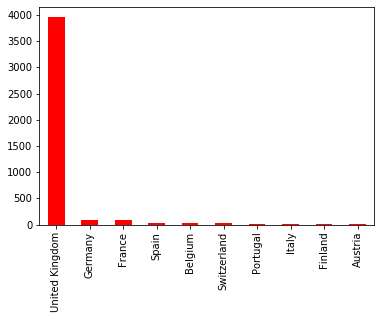

In [22]:
df_country["Country"].value_counts()[:10].plot(kind="bar", color= 'red')

Most of the customers are from UK

#### Filtering by Country= "United Kingdom" -- when most of the customers are from

In [23]:
df_uk = df[df["Country"]== "United Kingdom"]

In [24]:
df_uk.describe()

,Quantity,UnitPrice,CustomerID
count,495478.000000,495478.000000,361878.000000
mean,8.605486,4.532422,15547.871368
std,227.588756,99.315438,1594.402590
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14194.000000
50%,3.000000,2.100000,15514.000000
75%,10.000000,4.130000,16931.000000
max,80995.000000,38970.000000,18287.000000


In [43]:
df_uk[df_uk["UnitPrice"]<0] #negative unitprice -- adjust bad debt in description

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [44]:
df_uk[df_uk["Quantity"]<0].head()#negative quantity
df_uk[df_uk["Quantity"]<0].count() #9192 records with negative quantity-- impossible, drop it!

InvoiceNo      9192
StockCode      9192
Description    8330
Quantity       9192
InvoiceDate    9192
UnitPrice      9192
CustomerID     7533
Country        9192
dtype: int64

##### Drop records with negative unitprice and quantity

Possible reasons: order cancellation or return materials

In [75]:
df_uk= df_uk[(df_uk["Quantity"]>0) & (df_uk["UnitPrice"]>0)]


### CLV Calculation

Columns needed -> CustomerID, InvoiceDate, InvoiceNo, Quantity, and UnitPrice.

- CustomerID -> uniquely define different customers.
- InvoiceDate -> define when the customer buy the products, when was the last time? (ie. Recency -- time since last purchase)
- InvoiceNo -> count the number of times a customer performs a transaction (ie. Frequency).
- Quantity -> count purchased item units in each transaction.
- UnitPrice of each unit purchased - calculate the total purchased amount (ie. Monetary value).




In [76]:
df_uk_clv = df_uk[['CustomerID','InvoiceDate','InvoiceNo', 'Quantity','UnitPrice']]

In [77]:
max(df_uk_clv["InvoiceDate"])

Timestamp('2011-12-09 12:49:00')

In [78]:
# total purchase by customer

df_uk_clv["TotalPurchase"]= df_uk_clv["Quantity"]* df_uk_clv["UnitPrice"]

df_uk_clv

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPurchase
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
...,...,...,...,...,...,...
541889,15804.0,2011-12-09 12:31:00,581585,12,1.95,23.40
541890,13113.0,2011-12-09 12:49:00,581586,8,2.95,23.60
541891,13113.0,2011-12-09 12:49:00,581586,24,1.25,30.00
541892,13113.0,2011-12-09 12:49:00,581586,24,8.95,214.80


In [81]:
#df_uk_clv[df_uk_clv["CustomerID"]== 12747.0].head(30)

#### Calculate frequency, recency, monetary value

In [83]:
df_group= df_uk_clv.groupby("CustomerID").agg({"InvoiceDate": lambda date: (date.max() - date.min()).days, 
                                    "InvoiceNo": lambda num: num.nunique(), #same invoice number is considered a unique transaction
                                    "Quantity": lambda quant: quant.sum(),
                                    "TotalPurchase": lambda total: total.sum()})

df_group.sort_values(["TotalPurchase"], ascending= True)

,InvoiceDate,InvoiceNo,Quantity,TotalPurchase
CustomerID,,,,
16738.0,0,1,3,3.75
14792.0,0,1,2,6.20
16454.0,19,2,3,6.90
17956.0,0,1,1,12.75
16878.0,0,1,12,13.30
...,...,...,...,...
16029.0,335,63,40208,81024.84
17511.0,370,31,64549,91062.38
16446.0,204,2,80997,168472.50


In [84]:
#Change number of columns 

df_group.columns=['num_days','num_transactions','num_units_purchased','money_spent']


#### Formula CLV

- CLTV = ((Average Order Value x Purchase Frequency)/Churn Rate) x Profit margin.

- Customer Value = Average Order Value * Purchase Frequency

##### Calculate average order value

In [86]:
df_group["avg_order_value"]= df_group["money_spent"]/df_group["num_transactions"]

##### Calculate purchase frequency (individual or assume group average)

In [90]:
#individual
#df_group["frequency"]= df_group["num_transactions"]/df_group["num.days"]

#Group frequency
purchase_frequency = sum(df_group["num_transactions"])/df_group.shape[0]


##### Calculate Repeat Rate and then Churn Rate

In [91]:
repeat_rate=df_group[df_group.num_transactions > 1].shape[0]/df_group.shape[0]

In [92]:
churn_rate=1-repeat_rate

##### Calculate profit margin

Assumming a profit margin of 8% (assumption depends on the business)

In [95]:
df_group['profit_margin']= 0.08 * df_group['money_spent']


##### Finally, calculate CLV

In [97]:
df_group['CLV']=(df_group['avg_order_value']*purchase_frequency)/churn_rate


In [98]:
# CLV * profit margin

df_group['CLV_profit']=df_group['CLV']*df_group['profit_margin']


In [99]:
df_group.head()

,num_days,num_transactions,num_units_purchased,money_spent,avg_order_value,profit_margin,CLV,CLV_profit
CustomerID,,,,,,,,
12346.0,0,1,74215,77183.60,77183.600000,6174.6880,951702.374519,5.876465e+09
12747.0,366,11,1275,4196.01,381.455455,335.6808,4703.487034,1.578870e+06
12748.0,372,209,25747,33719.73,161.338421,2697.5784,1989.362487,5.366461e+06
12749.0,209,5,1471,4090.88,818.176000,327.2704,10088.413108,3.301639e+06
12820.0,323,4,722,942.34,235.585000,75.3872,2904.850304,2.189885e+05


##### Calculate total purchase amount (all customers) -- Quantity * price

In [52]:
total_purchase = df_uk_clv["Quantity"]* df_uk_clv["UnitPrice"]

print(f"Total purchase amount: {round(total_purchase.sum(),2)}")

Total purchase amount: 8187806.36


### Prediction Model for CLTV

#### Set df - train and test set

Model_ Multiple linear regression

In [104]:
#Adding month and year - time 
df_uk_clv["month_year"] = df_uk_clv["InvoiceDate"].apply(lambda x: x.strftime("%m-%Y"))



In [105]:
df_uk_clv.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPurchase,month_year
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30,12-2010
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34,12-2010
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00,12-2010
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34,12-2010
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34,12-2010


In [183]:
# Pivot table

df_pivot=df_uk_clv.pivot_table(index=['CustomerID'],columns=['month_year'],values='TotalPurchase',aggfunc='sum',fill_value=0).reset_index()



month_year,CustomerID,01-2011,02-2011,03-2011,04-2011,05-2011,06-2011,07-2011,08-2011,09-2011,10-2011,11-2011,12-2010,12-2011
0,12346.0,77183.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,12747.0,303.04,0.00,310.78,0.00,771.31,376.30,0.00,301.70,0.00,675.38,312.73,706.27,438.50
2,12748.0,418.77,389.64,1179.37,1100.37,2234.50,2006.26,1113.27,898.24,6148.84,2292.84,10639.23,4228.13,1070.27
3,12749.0,0.00,0.00,0.00,0.00,859.10,0.00,0.00,1896.13,0.00,0.00,572.59,0.00,763.06
4,12820.0,170.46,0.00,0.00,0.00,0.00,0.00,0.00,0.00,217.77,343.76,0.00,0.00,210.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,13971.0,0.00,333.48,309.34,0.00,331.70,306.46,0.00,704.92,0.00,371.66,400.70,0.00,0.00
811,13972.0,0.00,0.00,0.00,0.00,145.90,0.00,0.00,0.00,44.35,0.00,0.00,0.00,0.00
812,13973.0,0.00,264.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
813,13974.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,413.59,0.00,0.00,0.00


In [113]:
#Sum month sales
df_pivot['CLV']=df_pivot.iloc[:,1:].sum(axis=1) #axis = 1 --by row


In [116]:
#Define independent variables (x - features) and dependent variable (y - target)
X=df_pivot[['12-2011','11-2011', '10-2011','09-2011','08-2011','07-2011']]
y=df_pivot[['CLV']]

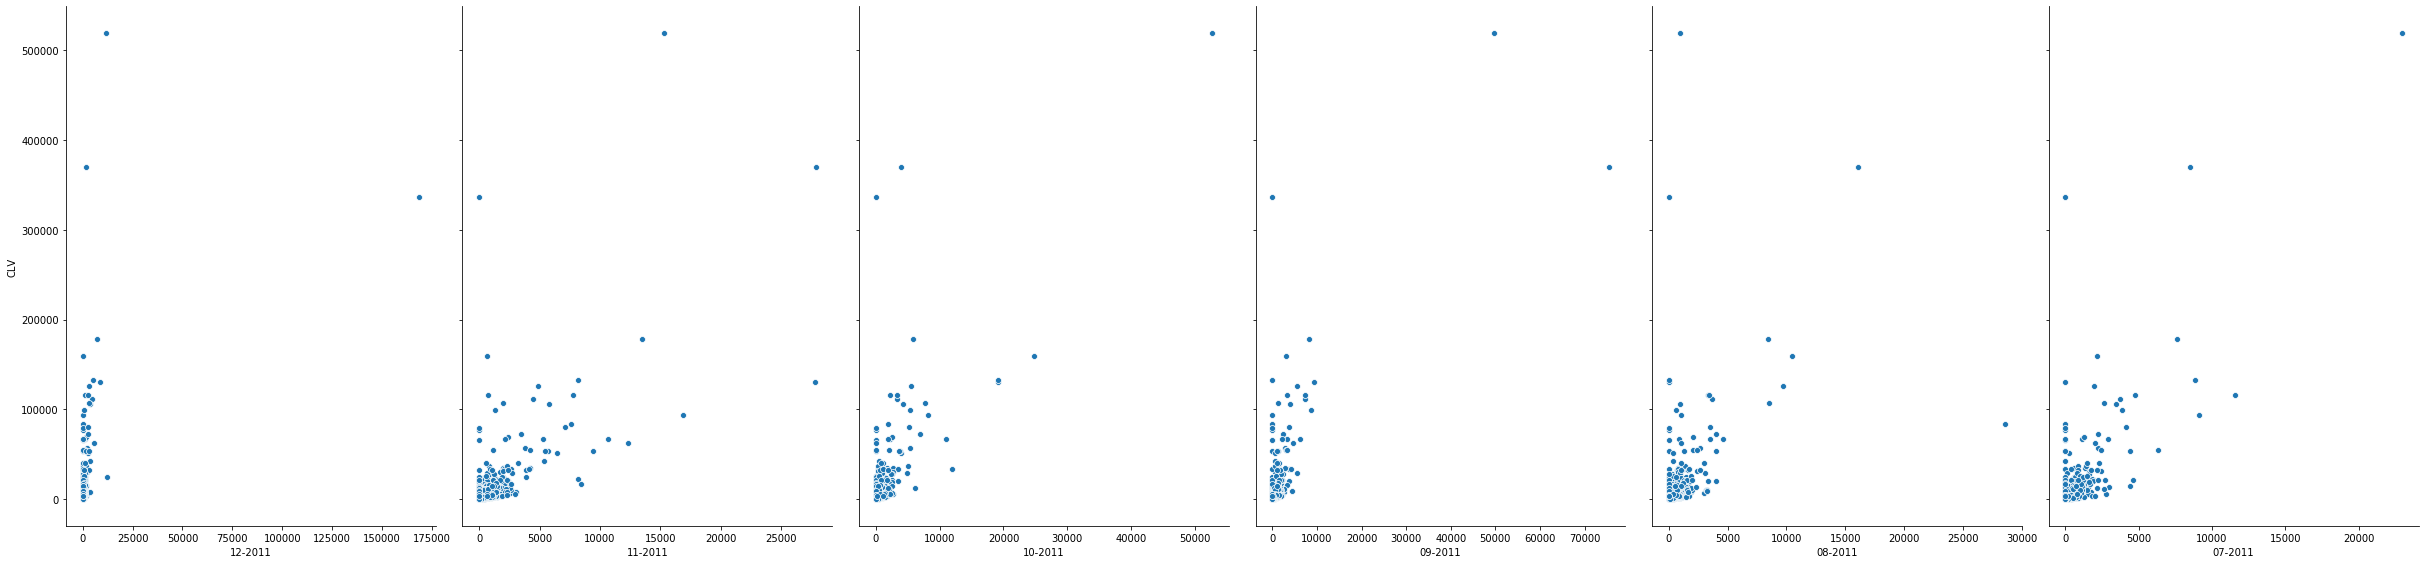

In [129]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df_pivot, x_vars=['12-2011','11-2011', '10-2011','09-2011','08-2011','07-2011'], y_vars='CLV', size=8, aspect=0.7)




In [123]:
# Split the data into training and testing sets: 70% training, 30% testing.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=123)

#### Model development

In [125]:
# Set model
linear_reg = LinearRegression()

# Fit the model to the training data
linear_reg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = linear_reg.predict(X_test)

#### Results

In [126]:
print(linear_reg.intercept_)
print(linear_reg.coef_) #Note coefficients represent associations, no causations.

[139.5025494]
[[2.00553772 2.62629881 3.60048211 4.41424647 2.7739204  5.47597658]]


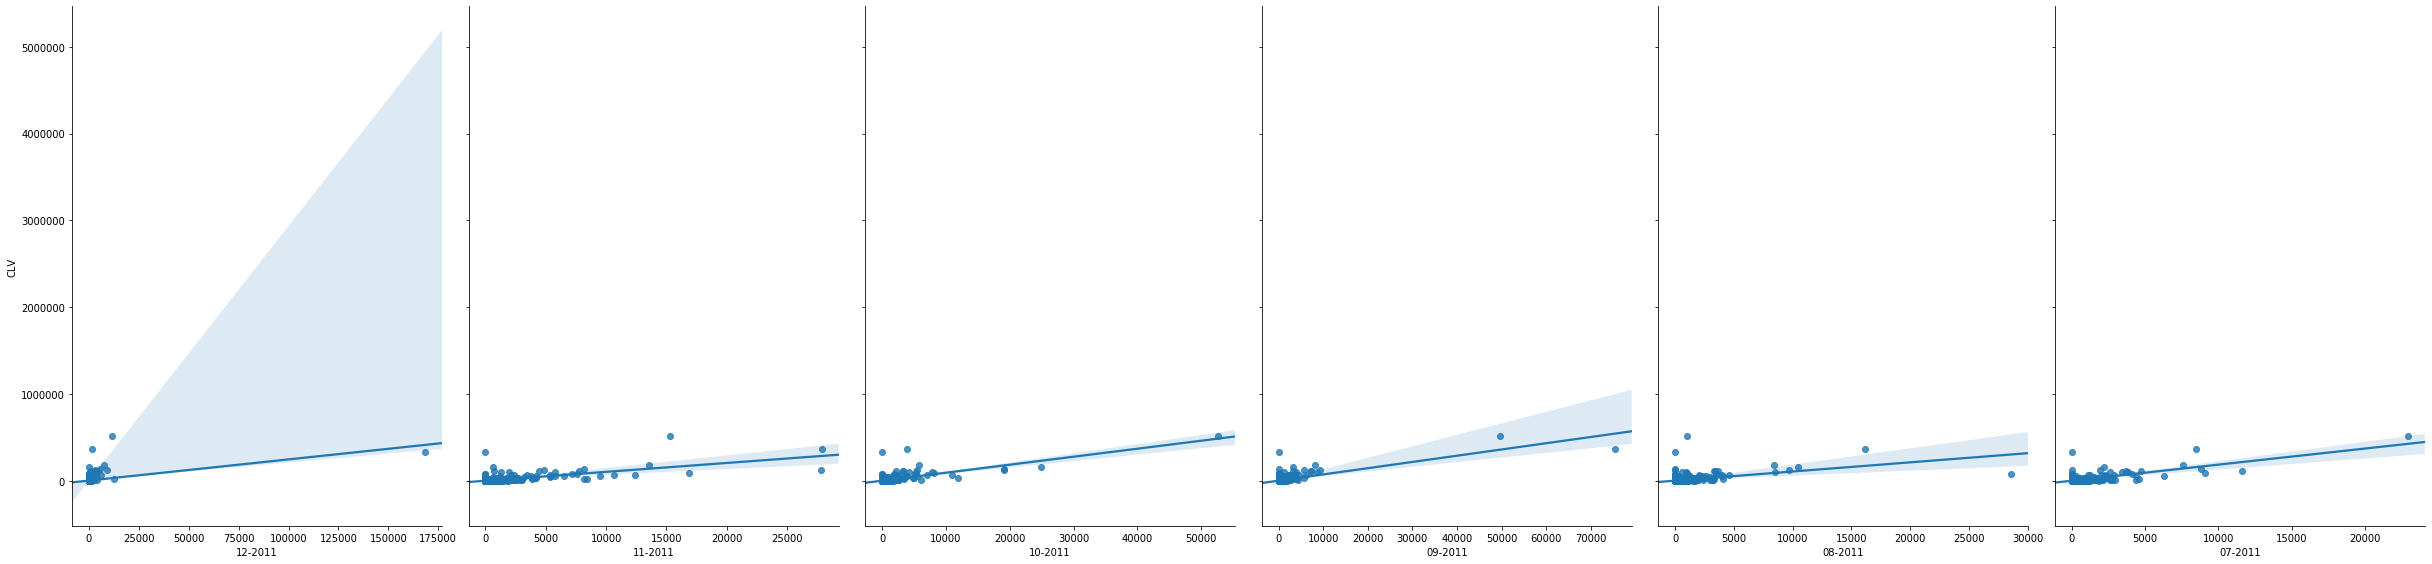

In [130]:
#Plotting the Least Squares Line
sns.pairplot(df_pivot, x_vars=['12-2011','11-2011', '10-2011','09-2011','08-2011','07-2011'], y_vars='CLV', size=8, aspect=0.7, kind='reg')


In [132]:
# print the confidence intervals for the model coefficients
#linear_reg.

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>

#### Model assessment

In [138]:
print(f"Training error = {1 - linear_reg.score(X_train, y_train):.2f}")
print(f"Test error = {1 - linear_reg.score(X_test, y_test):.2f}")

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Training error = 0.08
Test error = 0.08
5801.333819793393


In [146]:
# R-squared:

# LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
#     normalize=False)

print(linear_reg.score(X_train,y_train))
# 0.16118421052631582

#y_pred=lr.predict(X)
r2_score(y_test, y_pred)


0.9168553158794981


0.9166869109739229

- Mean Absolute Error (MAE) is the mean of the absolute value of the errors.
- Mean Squared Error (MSE) is the mean of the squared errors.
- Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors.

In [152]:
print(f"MAE: {metrics.mean_absolute_error(y_test,y_pred)}")
print(f"MSE: {metrics.mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}") #units of y

MAE: 1409.4428126026146
MSE: 33655474.0886786
RMSE: 5801.333819793393


In [155]:
pd.DataFrame({'features': X_train.columns,
              'coefs': linear_reg.coef_[0]}).sort_values(by='coefs')

,features,coefs
0,12-2011,2.005538
1,11-2011,2.626299
4,08-2011,2.773920
2,10-2011,3.600482
3,09-2011,4.414246
5,07-2011,5.475977


### Final conclusion and next steps

The model has been trained to predict the CLV of the customer base. 

Overfitting has been considered in the development of the model to avoid the issue. The model doesn't seem overfitted because there is not much difference between the training error and test error. Overfitting is suspect when the error of the model significantly increases when I test the model with new data (test set). 
In this case, it seems that the model has captured peculiarities and patterns of the training data and is able to generalize well to unseen data.

Next steps: 

- CLV prediction with current data
- Customer segmentation based on CLV
- Analayze predictions for each segment

### Appendix

In [158]:
#Create intercept for the model
X = np.append(arr = np.ones((df_pivot.shape[0],1)).astype(int), values = X, axis = 1)


In [161]:
#p-values - Backward elimination

regressor_OLS = sm.OLS(endog = y, exog = X).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CLV   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                 1.275e+04
Date:                Mon, 24 Aug 2020   Prob (F-statistic):               0.00
Time:                        20:06:05   Log-Likelihood:                -37209.
No. Observations:                3920   AIC:                         7.443e+04
Df Residuals:                    3913   BIC:                         7.448e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        434.6499     53.443      8.133      0.000     329.870     539.429
x1             2.0198      0.019    106.759      0.000       1.983       2.057
x2             1.8015      0.074     24.434      0.000       1.657       1.946
x3             3.4316      0.062     55.372      0.000       3.310       3.553
x4             2.8308      0.048     58.610      0.000       2.736       2.925
x5             3.3908      0.085     40.110      0.000       3.225       3.557
x6             6.1245      0.128     47.679      0.000       5.873       6.376
==============================================================================
Omnibus:                     6582.070   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10236440.825
Skew:                          10.998   Prob(JB):                         0.00
Kurtosis:                     252.376   Cond. No.                     2.86e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [168]:
df_pivot.shape

(3920, 15)

Issue highlighted: regression is not statistically significant while individual coefficients yes. 

##### Multicollinearity

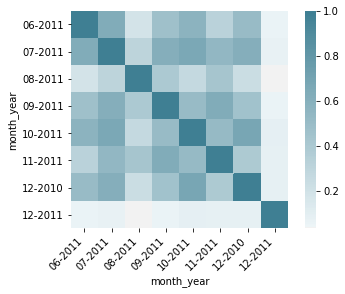

In [176]:
df_corr = df_pivot.iloc[:,6:14].corr()

# Generate correlation heatmap
ax = sns.heatmap(df_corr, center=0, cmap=sns.diverging_palette(20,220, n=256), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()


### References:


- https://towardsdatascience.com/data-driven-growth-with-python-part-3-customer-lifetime-value-prediction-6017802f2e0f

- https://data-science-blog.com/blog/2020/03/19/how-important-is-customer-lifetime-value/

- https://www.datacamp.com/community/tutorials/customer-life-time-value
